# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Cut Nabilah Putri Ulanty
- **Email:** mc319d5x2391@student.devacademy.id
- **ID Dicoding:** MC319D5X2391

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan polutan setiap tahun?
- Bagaimana kualitas udara tiap tahun pada tiap stasiun Aotizhongxin di 2013 - 2017?
- Adakah faktor cuaca yang mempengaruhi kualitas udara?

## Import Semua Packages/Library yang Digunakan

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [191]:
aotizhongxin_df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [192]:
print("KOLOM dan BARIS")
print(f"Jumlah baris dan kolom pada dataset aotizhongxin_df: {aotizhongxin_df.shape}")

KOLOM dan BARIS
Jumlah baris dan kolom pada dataset aotizhongxin_df: (35064, 18)


In [193]:
def siklus_pencatatan(df, df_name):
  nilai_kolom_jam=sorted(df['hour'].unique())
  print(f"Nilai dalam kolom 'hour' pada dataset {df_name}: {nilai_kolom_jam}")

siklus_pencatatan(aotizhongxin_df, "Aotizhongxin")

Nilai dalam kolom 'hour' pada dataset Aotizhongxin: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


**Insight:**
- **Dataset memiliki jumlah yang sama yaitu 35064 baris dan 18 kolom.** kolom-kolom tersebut di antaranya:
  1. No (Nomor urut data)
  2. year (Tahun)
  3. month(Bulan)
  4. day (Hari/Tanggal)
  5. hour (Jam)
  6. PM2.5 (Particulate Matter 2.5, partikel berukuran 2.5 yang merupakan polutan udara)
  7. PM10 (Particulate Matter 10, partikel berukuran 10 yang merupakan polutan udara)
  8. SO2 (Sulfur dioksida dalam udara)
  9. NO2 (Nitrogen Dioksida dalam udara)
  10. CO (karbon monoksida dalam udara)
  11. O3 (Ozon)
  12. TEMP (Temperatur/suhu udara)
  13. PRESS (Tekanan udara)
  14. DEWP (Dew Point / titik embun)
  15. RAIN (curah hujan)
  16. wd (wind direction/arah angin)
  17. WSPM (wind speed/ kecepatan angin)
  18. station (Nama stasiun)


- Pencatatan dilakukan sebanyak 24 kali dilihat berdasarkan unique value pada kolom hour yang menghasilkan list berisikan [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]. **Artinya pencatatan udara dilakukan sebanyak 24 kali dalam 1 hari dan dilakukan tiap 1 jam**

### Assessing Data

In [194]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [195]:
aotizhongxin_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [196]:
print("jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())

jumlah duplikasi:  0


In [197]:
aotizhongxin_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight :**
**DATASET AOTIZHONGXIN**

*   Terdapat missing value pada PM2.5, SO2, NO2, CO,O3, Temp, PRES, DEWP, RAIN, WD, WSPM
*   Tidak terdapat duplikasi data
*   Terdapat keanehan yang kemungkinan inacurrate value/outlier pada:
  1.   nilai maksimum CO yaitu 10000.00 dibandingkan dengan mean (1262.43), median (900) dan Q3 (1500).
  2.   nilai maksimum PM2.5 (898) dibandingkan median(58) dan Q3 (114).
  3. nilai maksimum PM10 (984) sedangkan median (87) dan Q3(155)

*   CO punya standar deviasi 1221.43 yang hampir dekat dengan mean-nya(1262.94) begitu juga dengan O3 dengan standar deviasi(57.91) yang lebih besar daripada median-nya(42). Berarti CO distribusinya bervariasi dan O3 distribusinya lebar sehingga perlu di cek lebih lanjut

* terdapat beberapa nilai yang perlu dicek lebih lanjut seperti nilai minimum TEMP, minimal DEWP yang terlalu ekstrem, nilai maksimum RAIN yang terlalu tinggi

### Cleaning Data

In [198]:
# Hapus baris dengan nilai NaN di kolom 'year', 'month', 'day', 'hour'
aotizhongxin_df.dropna(subset=['year', 'month', 'day', 'hour'], inplace=True)

# Membuat month dari angka menjadi nama bulan
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
aotizhongxin_df['month'] = aotizhongxin_df['month'].astype(int).map(month_mapping)

# Mengubah format hour jadi HH:MM
aotizhongxin_df['hour'] = aotizhongxin_df['hour'].astype(int).astype(str).str.zfill(2) + ':00'

# Gabungkan semua menjadi datetime
aotizhongxin_df['date'] = pd.to_datetime(
    aotizhongxin_df['year'].astype(str) + '-' + aotizhongxin_df['month'] + '-' + aotizhongxin_df['day'].astype(str) + ' ' + aotizhongxin_df['hour'],
    format='%Y-%b-%d %H:%M',
    errors='coerce'
)

# Menambahkan nama hari
aotizhongxin_df['weekday'] = aotizhongxin_df['date'].dt.day_name()

# Menampilkan hasil
aotizhongxin_df[['year', 'month', 'day', 'hour', 'weekday']].head()


,year,month,day,hour,weekday
0,2013,Mar,1,00:00,Friday
1,2013,Mar,1,01:00,Friday
2,2013,Mar,1,02:00,Friday
3,2013,Mar,1,03:00,Friday
4,2013,Mar,1,04:00,Friday


In [199]:
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,weekday
0,1,2013,Mar,1,00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,Friday
1,2,2013,Mar,1,01:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,Friday
2,3,2013,Mar,1,02:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,Friday
3,4,2013,Mar,1,03:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,Friday
4,5,2013,Mar,1,04:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,Friday


Mengatasi missing value

In [200]:
# Cek jumlah missing value di setiap kolom sebelum cleaning
print("Jumlah Missing Values Sebelum Cleaning:\n", aotizhongxin_df.isnull().sum())

# Kolom numerik yang diisi dengan median
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in numerical_cols:
    aotizhongxin_df[col].fillna(aotizhongxin_df[col].median(), inplace=True)

# Kolom kategorikal yang diisi dengan mode
aotizhongxin_df['wd'].fillna(aotizhongxin_df['wd'].mode()[0], inplace=True)

# Cek ulang apakah masih ada missing value
print("Jumlah Missing Values Setelah Cleaning:\n", aotizhongxin_df.isnull().sum())

Jumlah Missing Values Sebelum Cleaning:
 No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
date          0
weekday       0
dtype: int64
Jumlah Missing Values Setelah Cleaning:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
date       0
weekday    0
dtype: int64


<ipython-input-200-3d879d212b0f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aotizhongxin_df[col].fillna(aotizhongxin_df[col].median(), inplace=True)
<ipython-input-200-3d879d212b0f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

Mengatasi masalah Outlier yang ditemukan pada dataset Aotizhongxin pada proses asessing data (dituliskan di insight)

In [201]:
# Fungsi untuk menghapus outlier berdasarkan metode IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Kolom dengan kemungkinan outlier
columns_with_outliers = ['PM2.5', 'PM10', 'CO', 'RAIN']

# Menghapus outlier dari dataset langsung
for col in columns_with_outliers:
    aotizhongxin_df = remove_outliers(aotizhongxin_df, col)

# Cek ulang distribusi setelah menghapus outlier
print("Setelah Menghapus Outlier:\n", aotizhongxin_df.describe())

Setelah Menghapus Outlier:
                  No          year           day         PM2.5         PM10  \
count  29134.000000  29134.000000  29134.000000  29134.000000  29134.00000   
mean   17261.013627   2014.635786     15.832429     61.110362     86.51003   
min        1.000000   2013.000000      1.000000      3.000000      2.00000   
25%     8681.250000   2014.000000      8.000000     19.000000     34.00000   
50%    17242.500000   2015.000000     16.000000     50.000000     76.00000   
75%    26281.750000   2016.000000     23.000000     88.000000    125.00000   
max    35064.000000   2017.000000     31.000000    245.000000    294.00000   
std    10092.914252      1.180604      8.803222     50.629786     62.38518   

                SO2           NO2            CO            O3          TEMP  \
count  29134.000000  29134.000000  29134.000000  29134.000000  29134.000000   
mean      13.488750     51.901886    891.978719     61.345354     14.815346   
min        0.285600      2.00000

Memeriksa anomali pada TEMP, DEWP, dan O3

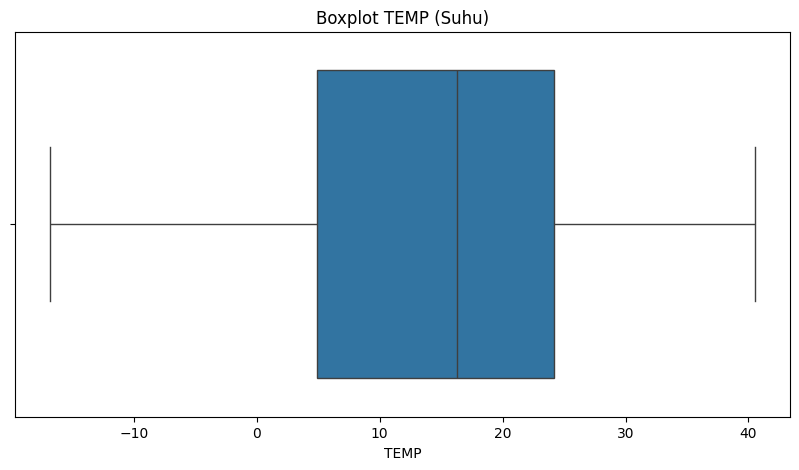

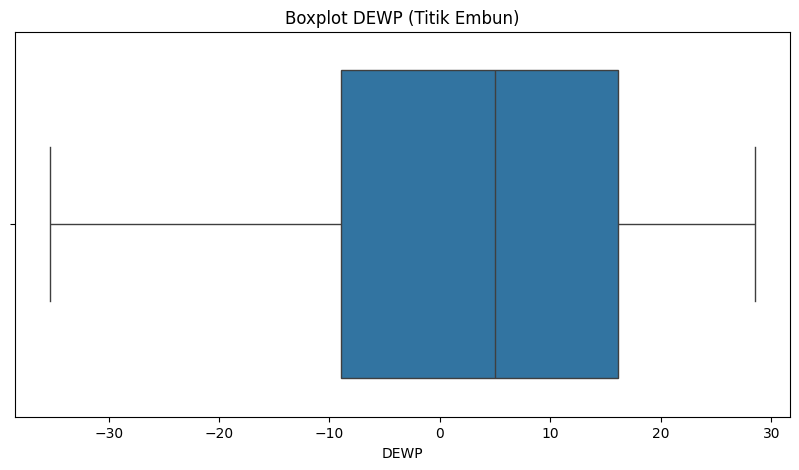

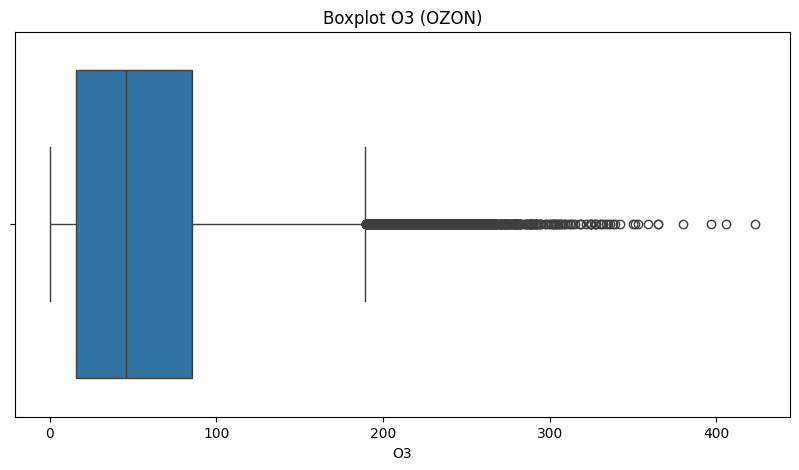

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x=aotizhongxin_df["TEMP"])
plt.title("Boxplot TEMP (Suhu)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=aotizhongxin_df["DEWP"])
plt.title("Boxplot DEWP (Titik Embun)")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=aotizhongxin_df["O3"])
plt.title("Boxplot O3 (OZON)")
plt.show()

Melihat banyaknya nilai ektrem

Skewness sebelum transformasi:
PM2.5    1.134191
PM10     0.818055
CO       0.995657
O3       1.426683
dtype: float64


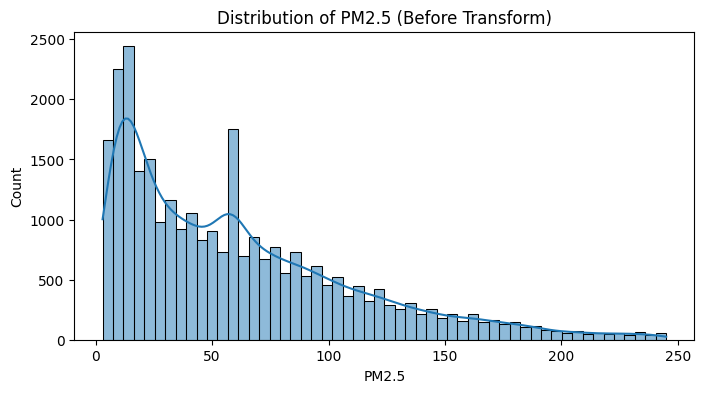

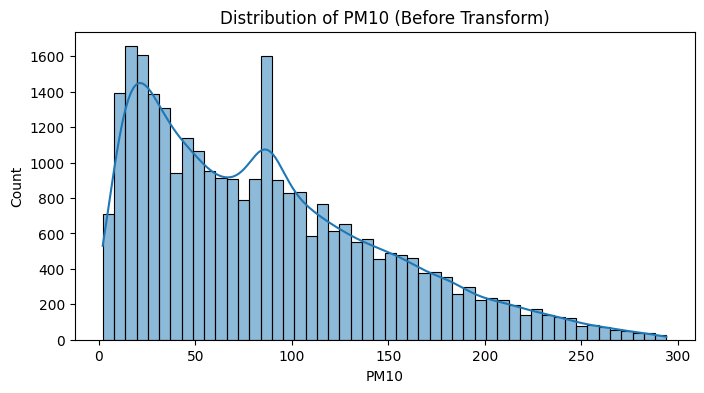

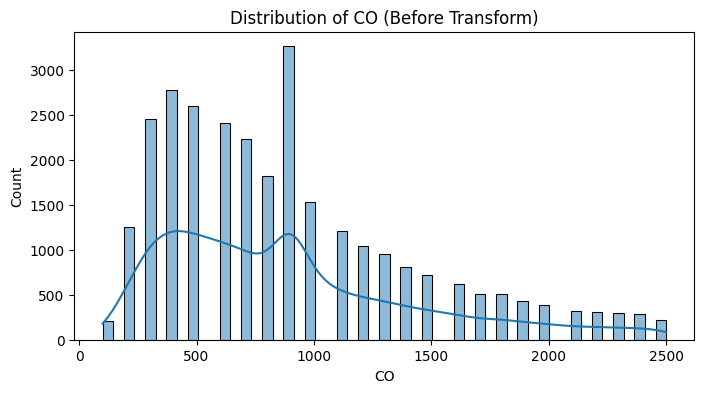

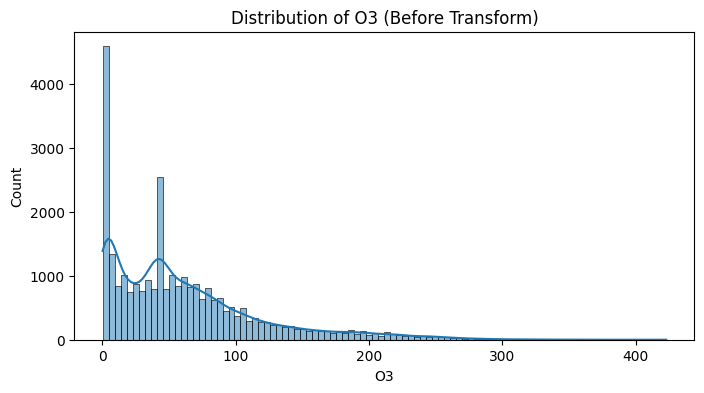

In [203]:
# Cek skewness pada beberapa kolom
columns_to_check = ['PM2.5', 'PM10', 'CO', 'O3']
skewness_values = aotizhongxin_df[columns_to_check].skew()

# Menampilkan skewness sebelum transformasi
print("Skewness sebelum transformasi:")
print(skewness_values)

# Plot histogram sebelum transformasi
for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(aotizhongxin_df[col], kde=True)
    plt.title(f'Distribution of {col} (Before Transform)')
    plt.show()

Melakukan transformasi agar distribusi menjadi lebih normal

Kolom yang akan ditransformasikan: ['PM2.5', 'O3']


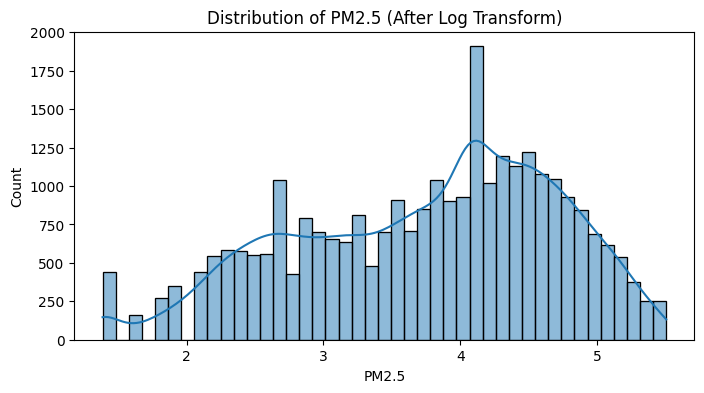

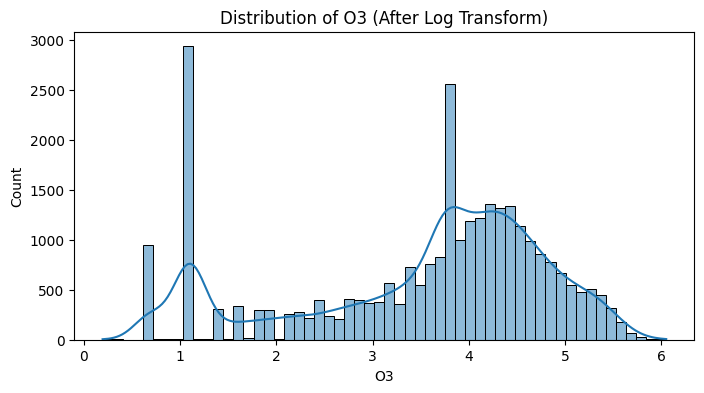

Skewness setelah transformasi:
PM2.5   -0.404268
O3      -0.767611
dtype: float64


In [204]:
import numpy as np

# Hanya transformasi jika skewness > 1 atau < -1
columns_to_transform = [col for col in columns_to_check if abs(skewness_values[col]) > 1]
print(f"Kolom yang akan ditransformasikan: {columns_to_transform}")

# Terapkan log transformasi
for col in columns_to_transform:
    aotizhongxin_df[col] = np.log1p(aotizhongxin_df[col])  # log1p untuk menghindari log(0)

# Plot histogram setelah transformasi
for col in columns_to_transform:
    plt.figure(figsize=(8, 4))
    sns.histplot(aotizhongxin_df[col], kde=True)
    plt.title(f'Distribution of {col} (After Log Transform)')
    plt.show()

# Cek skewness setelah transformasi
print("Skewness setelah transformasi:")
print(aotizhongxin_df[columns_to_transform].skew())

**Insight:**
- suhu (TEMP) dan titik embun (DEWP), menunjukkan distribusi yang relatif normal dan stabil. Nilai pada kolom ini masih wajar
- Boxplot dengan O3 memiliki titik-titik diluar whisker yang berarti O3 memiliki outlier, Kadar ozon dalam data ini menunjukkan variabilitas yang tinggi, dengan banyak nilai ekstrem yang jauh di atas rata-rata.
- Data PM2.5 dan O3 menunjukkan variabilitas tinggi dan distribusi tidak normal sehingga memerlukan analisis lanjutan dan pertimbangan transformasi data untuk pemahaman yang lebih akurat. (nilai skewness>1 (kanan/positif skewed) → data memiliki ekor panjang ke kanan (banyak nilai ekstrem tinggi).)
-Transformasi logaritma berhasil menormalisasi distribusi data PM2.5 dan O3 yang sebelumnya miring, sehingga meningkatkan potensi akurasi analisis statistik

## Exploratory Data Analysis (EDA)

### STANDAR AQI (Air Quality Index)
Berdasarkan  EPA (Badan Perlindungan Lingkungan AS) dan disesuaikan dengan panduan WHO:
sumber : [link text](https://www.epa.gov/aqi)
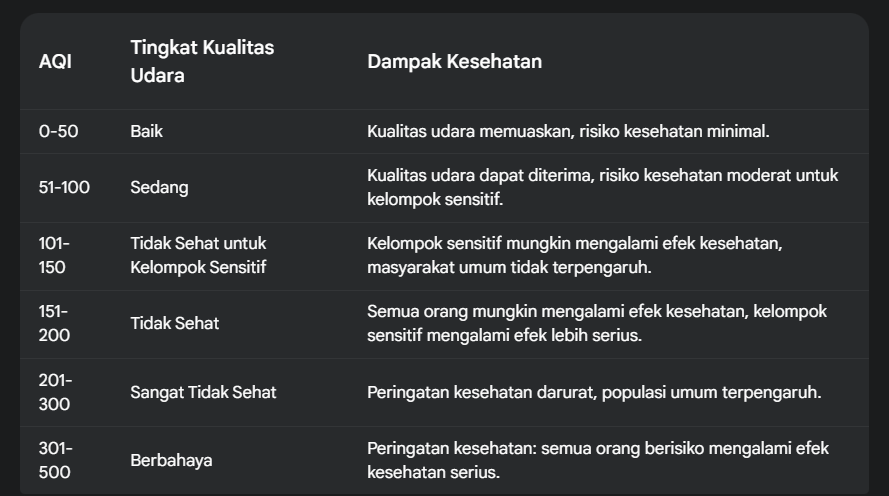

Tabel Indeks Kualitas Udara (AQI) Berdasarkan Polutan:
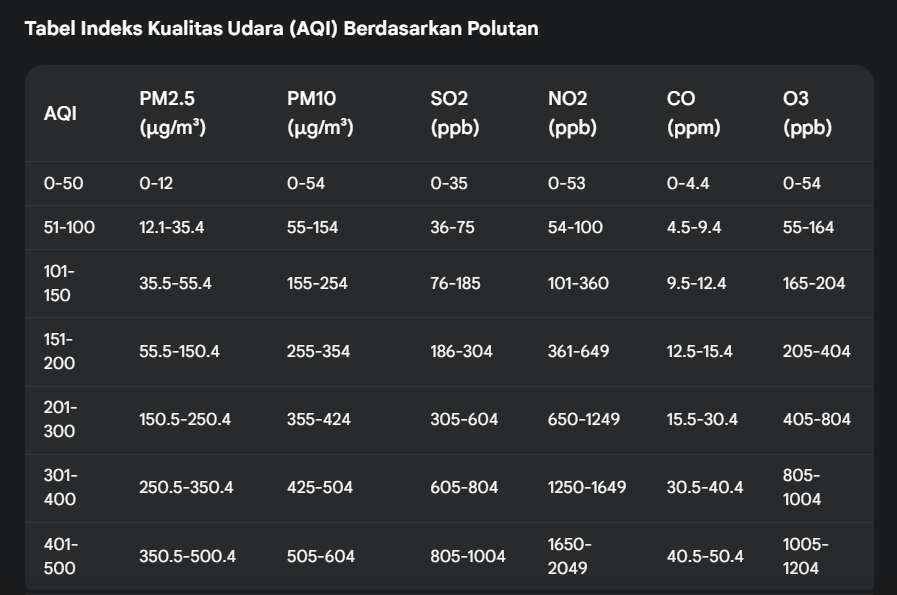

Rumus Umum :
AQI = [(I_high - I_low) / (BP_high - BP_low)] * (C_p - BP_low) + I_low

- C_p: Konsentrasi polutan
- BP_high: Batas atas rentang konsentrasi
- BP_low: Batas bawah rentang konsentrasi
- I_high: Indeks AQI batas atas
- I_low: Indeks AQI batas bawah

### Explore Dataset

In [205]:
aotizhongxin_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,weekday
0,1,2013,Mar,1,00:00,1.609438,4.0,4.0,7.0,300.0,4.356709,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,Friday
1,2,2013,Mar,1,01:00,2.197225,8.0,4.0,7.0,300.0,4.356709,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,Friday
2,3,2013,Mar,1,02:00,2.079442,7.0,5.0,10.0,300.0,4.304065,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,Friday
3,4,2013,Mar,1,03:00,1.945910,6.0,11.0,11.0,300.0,4.290459,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,Friday
4,5,2013,Mar,1,04:00,1.386294,3.0,12.0,12.0,300.0,4.290459,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,Friday
5,6,2013,Mar,1,05:00,1.791759,5.0,18.0,18.0,400.0,4.204693,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,2013-03-01 05:00:00,Friday
6,7,2013,Mar,1,06:00,1.386294,3.0,18.0,32.0,500.0,3.931826,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,2013-03-01 06:00:00,Friday
7,8,2013,Mar,1,07:00,1.386294,6.0,19.0,41.0,500.0,3.784190,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,2013-03-01 07:00:00,Friday
8,9,2013,Mar,1,08:00,1.386294,6.0,16.0,43.0,500.0,3.828641,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,2013-03-01 08:00:00,Friday
9,10,2013,Mar,1,09:00,1.386294,8.0,12.0,28.0,400.0,4.094345,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,2013-03-01 09:00:00,Friday


Membuat fungsi untuk menghitung AQI dan ketegori kualitas udara

In [206]:
df = aotizhongxin_df

# Definisi fungsi untuk menghitung AQI berdasarkan polutan
def calculate_aqi_pm25(pm25):
    if pm25 <= 12:
        return pm25 / 12 * 50
    elif pm25 <= 35.4:
        return (pm25 - 12.1) / (35.4 - 12) * 50 + 51
    elif pm25 <= 55.4:
        return (pm25 - 35.5) / (55.4 - 35.4) * 50 + 101
    elif pm25 <= 150.4:
        return (pm25 - 55.5) / (150.4 - 55.4) * 50 + 151
    elif pm25 <= 250.4:
        return (pm25 - 150.5) / (250.4 - 150.4) * 50 + 201
    elif pm25 <= 350.4:
        return (pm25 - 250.5) / (350.4 - 250.4) * 50 + 301
    elif pm25 <= 500.4:
        return (pm25 - 350.5) / (500.4 - 350.4) * 50 + 401
    else:
        return 500

def calculate_aqi_pm10(pm10):
    if pm10 <= 54:
        return pm10 / 54 * 50
    elif pm10 <= 154:
        return (pm10 - 55) / (154 - 54) * 50 + 51
    elif pm10 <= 254:
        return (pm10 - 155) / (254 - 154) * 50 + 101
    elif pm10 <= 354:
        return (pm10 - 255) / (354 - 254) * 50 + 151
    elif pm10 <= 424:
        return (pm10 - 355) / (424 - 354) * 50 + 201
    elif pm10 <= 504:
        return (pm10 - 425) / (504 - 424) * 50 + 301
    elif pm10 <= 604:
        return (pm10 - 505) / (604 - 504) * 50 + 401
    else:
        return 500

def calculate_aqi_so2(so2):
    if so2 <= 35:
        return so2 / 35 * 50
    elif so2 <= 75:
        return (so2 - 36) / (75 - 35) * 50 + 51
    elif so2 <= 185:
        return (so2 - 76) / (185 - 75) * 50 + 101
    elif so2 <= 304:
        return (so2 - 186) / (304 - 185) * 50 + 151
    elif so2 <= 604:
        return (so2 - 305) / (604 - 304) * 50 + 201
    elif so2 <= 804:
        return (so2 - 605) / (804 - 604) * 50 + 301
    elif so2 <= 1004:
        return (so2 - 805) / (1004 - 804) * 50 + 401
    else:
        return 500

def calculate_aqi_no2(no2):
    if no2 <= 53:
        return no2 / 53 * 50
    elif no2 <= 100:
        return (no2 - 54) / (100 - 53) * 50 + 51
    elif no2 <= 360:
        return (no2 - 101) / (360 - 100) * 50 + 101
    elif no2 <= 649:
        return (no2 - 361) / (649 - 360) * 50 + 151
    elif no2 <= 1249:
        return (no2 - 650) / (1249 - 649) * 50 + 201
    elif no2 <= 1649:
        return (no2 - 1250) / (1649 - 1249) * 50 + 301
    elif no2 <= 2049:
        return (no2 - 1650) / (2049 - 1649) * 50 + 401
    else:
        return 500

def calculate_aqi_co(co):
    if co <= 4.4:
        return co / 4.4 * 50
    elif co <= 9.4:
        return (co - 4.5) / (9.4 - 4.4) * 50 + 51
    elif co <= 12.4:
        return (co - 9.5) / (12.4 - 9.4) * 50 + 101
    elif co <= 15.4:
        return (co - 12.5) / (15.4 - 12.4) * 50 + 151
    elif co <= 30.4:
        return (co - 15.5) / (30.4 - 15.4) * 50 + 201
    elif co <= 40.4:
        return (co - 30.5) / (40.4 - 30.4) * 50 + 301
    elif co <= 50.4:
        return (co - 40.5) / (50.4 - 40.4) * 50 + 401
    else:
        return 500

def calculate_aqi_o3(o3):
    if o3 <= 54:
        return o3 / 54 * 50
    elif o3 <= 164:
        return (o3 - 55) / (164 - 54) * 50 + 51
    elif o3 <= 204:
        return (o3 - 165) / (204 - 164) * 50 + 101
    elif o3 <= 404:
        return (o3 - 205) / (404 - 204) * 50 + 151
    elif o3 <= 804:
        return (o3 - 405) / (804 - 404) * 50 + 201
    elif o3 <= 1004:
        return (o3 - 805) / (1004 - 804) * 50 + 301
    elif o3 <= 1204:
        return (o3 - 1005) / (1204 - 1004) * 50 + 401
    else:
        return 500

# Menghitung AQI untuk setiap baris dalam dataset
aqi_values = []
for _, row in df.iterrows():
    if row.isnull().any():
        aqi_values.append(np.nan)
        continue

    co_mgm3 = (row['CO'] / 1000 * 28.01) / 24.45

    aqi = max([
        calculate_aqi_pm25(row['PM2.5']),
        calculate_aqi_pm10(row['PM10']),
        calculate_aqi_so2(row['SO2']),
        calculate_aqi_no2(row['NO2']),
        calculate_aqi_co(co_mgm3),
        calculate_aqi_o3(row['O3'])
    ])

    aqi_values.append(aqi)

df['AQI'] = aqi_values

# Pengkategorian kualitas udara
def get_aqi_category(aqi):
    return ['Baik', 'Sedang', 'Tidak Sehat untuk Kelompok Sensitif', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya'][
        (aqi > 50) + (aqi > 100) + (aqi > 150) + (aqi > 200) + (aqi > 300)
    ]

df['AQI_Category'] = df['AQI'].apply(get_aqi_category)

# Menampilkan hasil
print(df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQI', 'AQI_Category']].head())


      PM2.5  PM10   SO2   NO2     CO        O3        AQI AQI_Category
0  1.609438   4.0   4.0   7.0  300.0  4.356709   6.705991         Baik
1  2.197225   8.0   4.0   7.0  300.0  4.356709   9.155102         Baik
2  2.079442   7.0   5.0  10.0  300.0  4.304065   9.433962         Baik
3  1.945910   6.0  11.0  11.0  300.0  4.290459  15.714286         Baik
4  1.386294   3.0  12.0  12.0  300.0  4.290459  17.142857         Baik


Mencari rata-rata kadar tiap polutan pada tahun 2013-2017

In [207]:
df['year'] = df['date'].dt.year
yearly_avg_pollutants = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

# Tampilkan tabel rata-rata kadar polutan tahunan
print("Rata-rata Kadar Polutan Tahunan:")
print(yearly_avg_pollutants)

Rata-rata Kadar Polutan Tahunan:
   year     PM2.5       PM10        SO2        NO2          CO        O3
0  2013  3.846372  97.851660  20.068327  58.892537  936.449269  3.271456
1  2014  3.897565  95.188749  15.241842  57.159643  892.949757  3.278722
2  2015  3.682213  85.559535  10.916229  51.739137  925.418350  3.810277
3  2016  3.614363  73.107661   8.218441  41.239593  834.142373  3.706751
4  2017  3.293463  57.500000  15.266417  48.519700  802.720450  3.744976


Rata - rata kualitas udara tahunan

In [208]:
yearly_avg_aqi = df.groupby('year')['AQI'].mean().reset_index()

# Tampilkan tabel rata-rata AQI tahunan
print("Rata-rata AQI Tahunan:")
print(yearly_avg_aqi)

Rata-rata AQI Tahunan:
   year        AQI
0  2013  75.179991
1  2014  74.597104
2  2015  68.309589
3  2016  59.912887
4  2017  54.123943


**Insight:**
- kualitas udara paling baik adalah pada tahun 2017 dan paling buruk pada 2013

In [209]:
corr_matrix = aotizhongxin_df.select_dtypes(include=['number']).corr()
corr_matrix

,No,year,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,AQI
No,1.000000,0.972564,0.023489,-0.135569,-0.190605,-0.306153,-0.185499,-0.062953,0.117141,-0.068527,0.216645,-0.120149,NaN,0.122425,-0.203759
year,0.972564,1.000000,0.006929,-0.132980,-0.172039,-0.239788,-0.207229,-0.063854,0.152104,-0.103372,0.218690,-0.183742,NaN,0.158500,-0.191658
day,0.023489,0.006929,1.000000,0.044835,0.049423,-0.022928,0.039518,0.008659,-0.014462,0.010820,0.016590,0.024813,NaN,-0.027531,0.052115
PM2.5,-0.135569,-0.132980,0.044835,1.000000,0.797854,0.376923,0.584515,0.690049,-0.173211,0.191386,-0.265276,0.413034,NaN,-0.334977,0.806366
PM10,-0.190605,-0.172039,0.049423,0.797854,1.000000,0.409004,0.551116,0.590392,-0.148294,0.119698,-0.210884,0.244149,NaN,-0.172720,0.940773
SO2,-0.306153,-0.239788,-0.022928,0.376923,0.409004,1.000000,0.328971,0.519513,-0.171481,-0.276232,0.158916,-0.239759,NaN,-0.065865,0.424050
NO2,-0.185499,-0.207229,0.039518,0.584515,0.551116,0.328971,1.000000,0.608048,-0.595203,-0.082594,-0.040074,0.199705,NaN,-0.510606,0.701236
CO,-0.062953,-0.063854,0.008659,0.690049,0.590392,0.519513,0.608048,1.000000,-0.384997,-0.177813,0.082914,0.070499,NaN,-0.315536,0.622046
O3,0.117141,0.152104,-0.014462,-0.173211,-0.148294,-0.171481,-0.595203,-0.384997,1.000000,0.427478,-0.266036,0.109626,NaN,0.394878,-0.277440
TEMP,-0.068527,-0.103372,0.010820,0.191386,0.119698,-0.276232,-0.082594,-0.177813,0.427478,1.000000,-0.837412,0.835421,NaN,-0.021781,0.091456


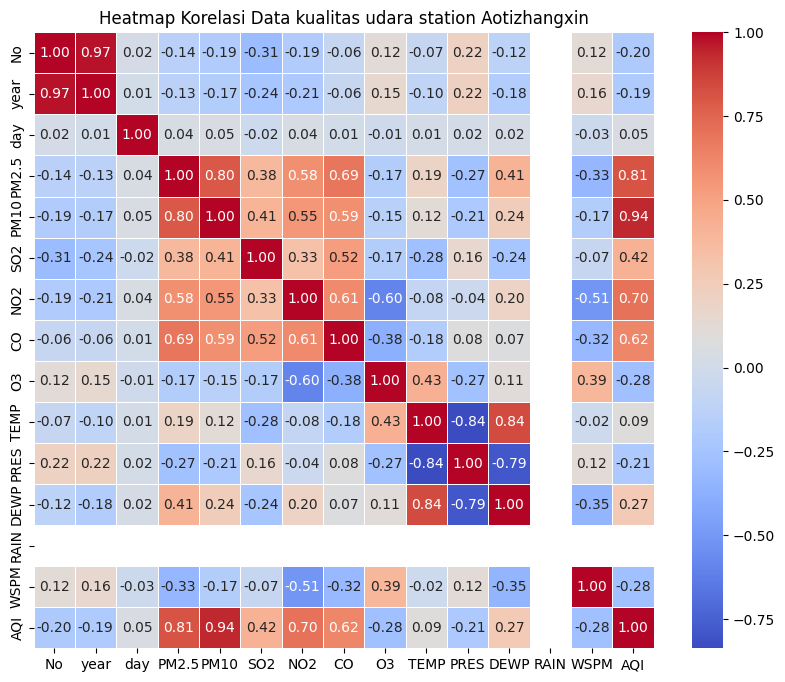

In [210]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Data kualitas udara station Aotizhangxin")
plt.show()

**Insight:**
- PM2.5 dan PM10 memiliki korelasi positif yang sangat kuat (0.97), menunjukkan bahwa jika salah satu meningkat, yang lain juga cenderung meningkat.
- AQI berkorelasi positif dengan NO2, SO2, dan CO, yang berarti peningkatan gas polutan ini berkontribusi pada memburuknya kualitas udara.
- Tekanan udara (PRES) memiliki korelasi negatif dengan AQI (-0.28), menunjukkan bahwa ketika tekanan udara meningkat, kualitas udara cenderung lebih baik.
- Suhu (TEMP) memiliki korelasi positif dengan O3 (0.81), yang menunjukkan bahwa konsentrasi O3 meningkat saat suhu lebih tinggi.
- RAIN tidak memiliki korelasi yang signifikan dengan polutan dalam analisis ini


Menganalisa kualitas udara per hari (dipersempit hanya dalam waktu 1 bulan terakhir)

In [212]:
# memastikan 'date' dalam format datetime
aotizhongxin_df['date'] = pd.to_datetime(aotizhongxin_df['date'])

# mengambil bulan terakhir dalam dataset
latest_month = aotizhongxin_df['date'].dt.to_period('M').max()

# Filter data hanya untuk bulan terakhir
latest_month_df = aotizhongxin_df[aotizhongxin_df['date'].dt.to_period('M') == latest_month]

# Hitung rata-rata AQI berdasarkan tanggal dan jam
result = latest_month_df.groupby([latest_month_df['date'].dt.date, 'hour'])['AQI'].mean().reset_index()

# Ubah nama kolom agar lebih rapi
result.rename(columns={'date': 'Tanggal', 'hour': 'Jam', 'AQI': 'Rata-rata AQI'}, inplace=True)

# Tampilkan hasil
print(result)

        Tanggal    Jam  Rata-rata AQI
0    2017-02-01  00:00      16.666667
1    2017-02-01  01:00      19.444444
2    2017-02-01  02:00      19.444444
3    2017-02-01  03:00      21.296296
4    2017-02-01  04:00      19.444444
..          ...    ...            ...
549  2017-02-28  19:00      33.018868
550  2017-02-28  20:00      42.452830
551  2017-02-28  21:00      63.765957
552  2017-02-28  22:00      86.106383
553  2017-02-28  23:00      77.595745

[554 rows x 3 columns]


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana history perkembangan polutan setiap tahun?

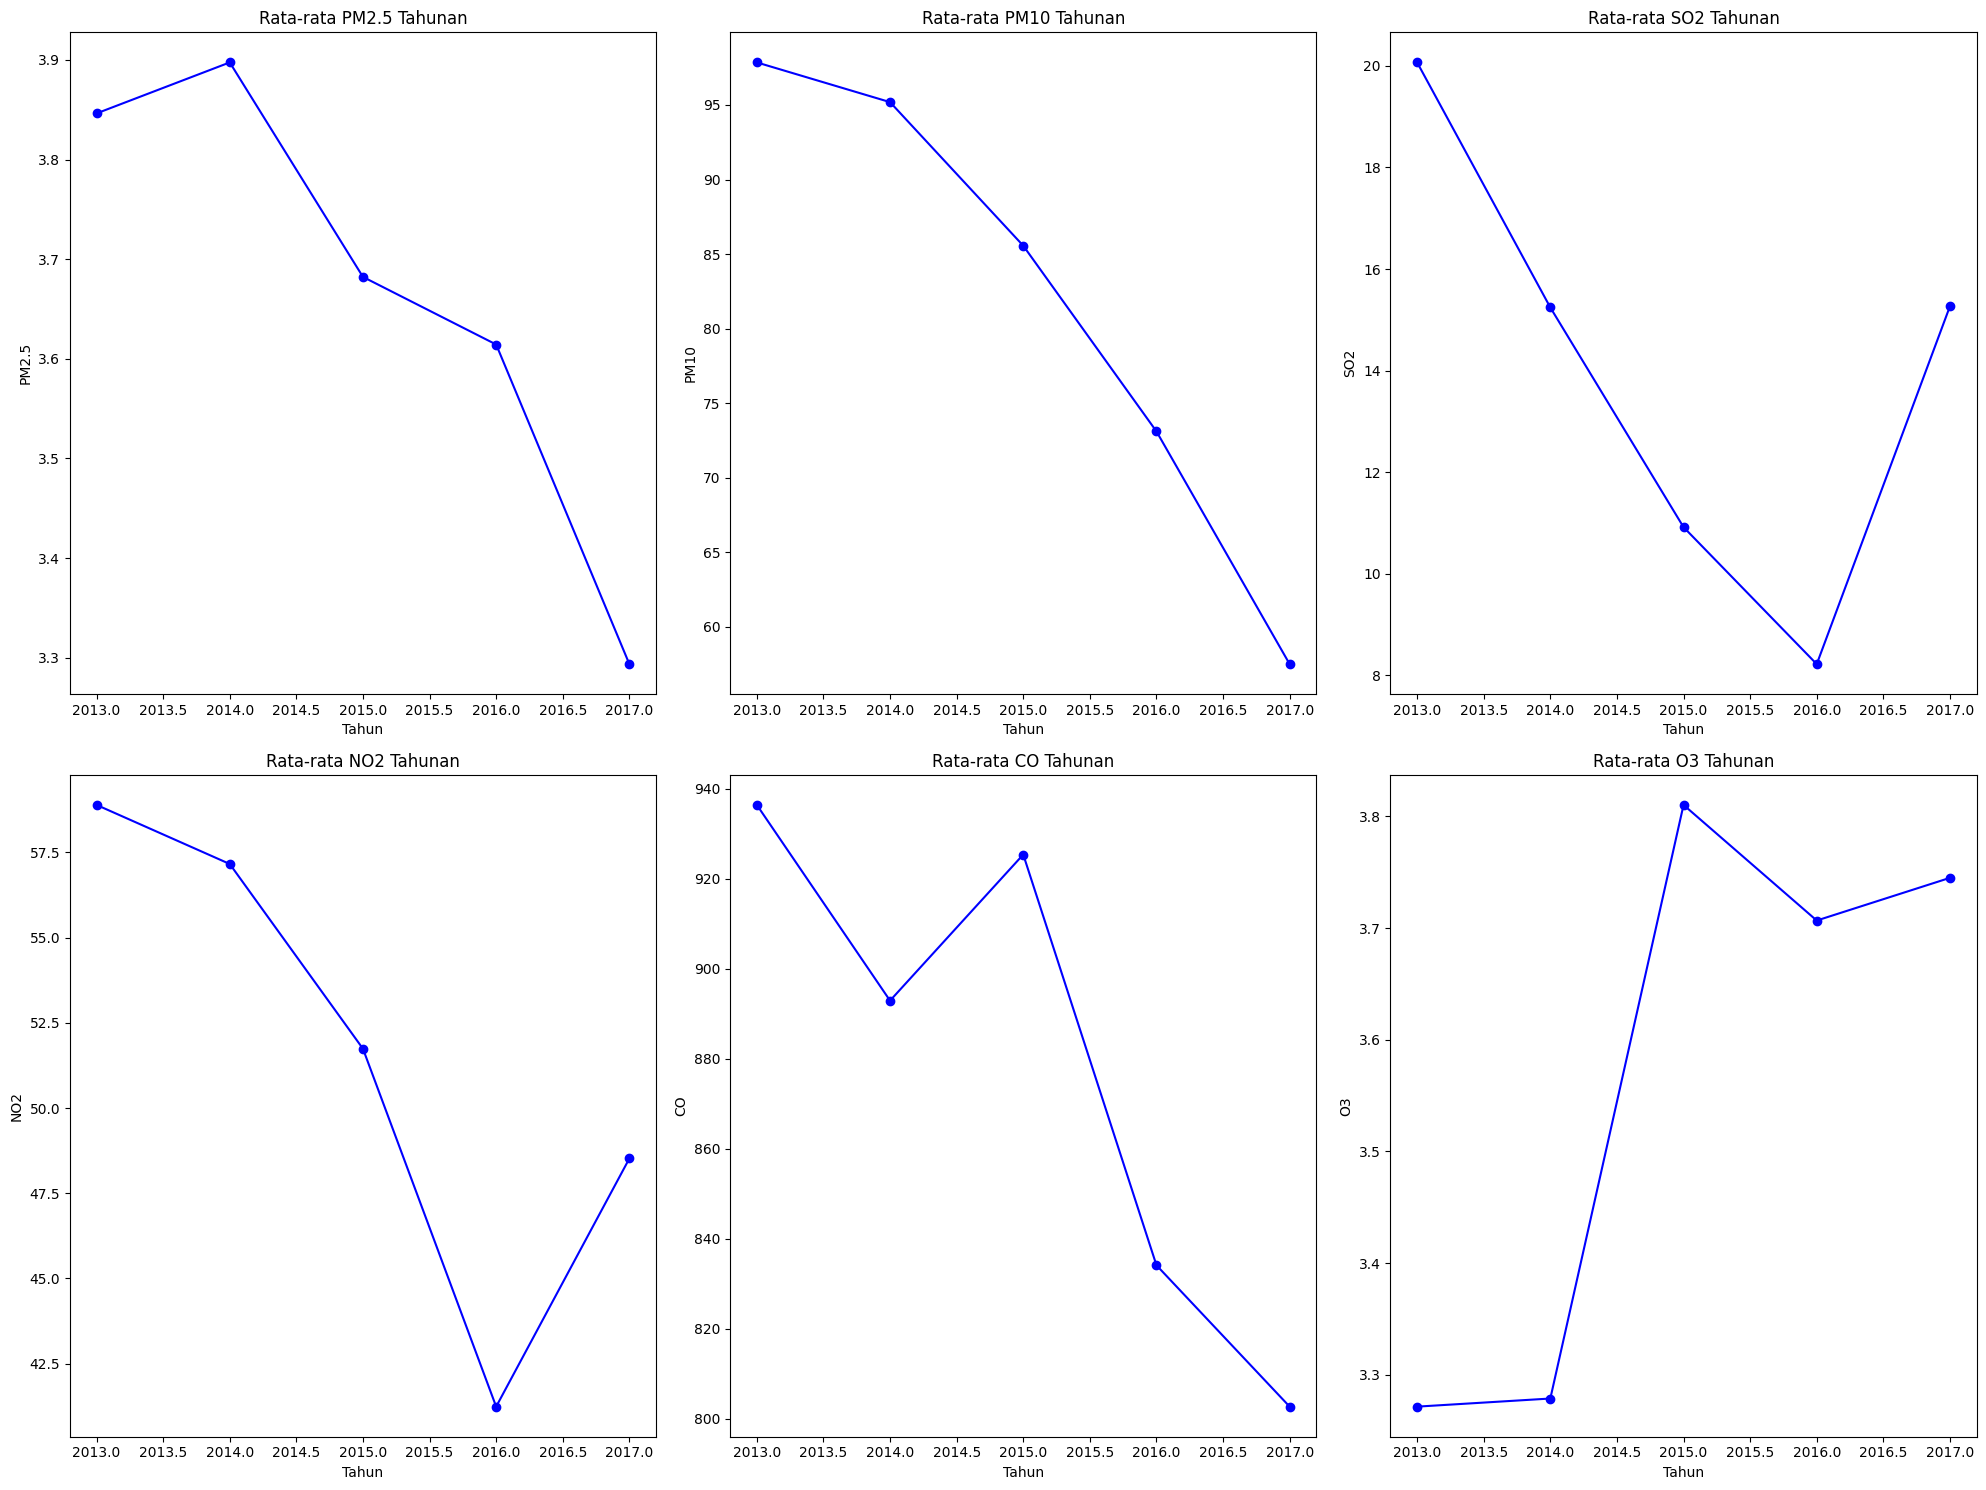

In [213]:
aotizhongxin_df['date'] = pd.to_datetime(aotizhongxin_df['date'])

# Tambahkan kolom tahun
aotizhongxin_df['year'] = aotizhongxin_df['date'].dt.year

# Daftar polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Visualisasi rata-rata polutan tahunan
plt.figure(figsize=(20, 15))
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i + 1)

    # Menghitung rata-rata polutan tahunan
    yearly_pollutants = aotizhongxin_df.groupby('year')[pollutant].mean()

    # Plot
    plt.plot(yearly_pollutants.index, yearly_pollutants.values, marker='o', linestyle='-', color='b')

    plt.title(f'Rata-rata {pollutant} Tahunan')
    plt.xlabel('Tahun')
    plt.ylabel(pollutant)

plt.tight_layout()
plt.show()

**Insight:**
- PM10 terus mengalami penurunan setiap tahunnya dari 2013 hingga 2017.
- PM2.5 juga menurun secara keseluruhan, dengan sedikit kenaikan di tahun 2014 sebelum kembali turun.
- SO2 mengalami penurunan signifikan dari 2013 hingga 2016, tetapi naik lagi pada tahun 2017.
- NO2 menurun drastis dari 2013 hingga 2016, tetapi mulai meningkat lagi pada 2017.
- CO mengalami fluktuasi dengan kenaikan di 2015, tetapi turun drastis setelahnya hingga 2017.
- O3 justru mengalami kenaikan signifikan di 2015, sedikit menurun di 2016, lalu meningkat lagi pada 2017.

### Pertanyaan 2:
Bagaimana kualitas udara tiap tahun pada station Aotizhongxin

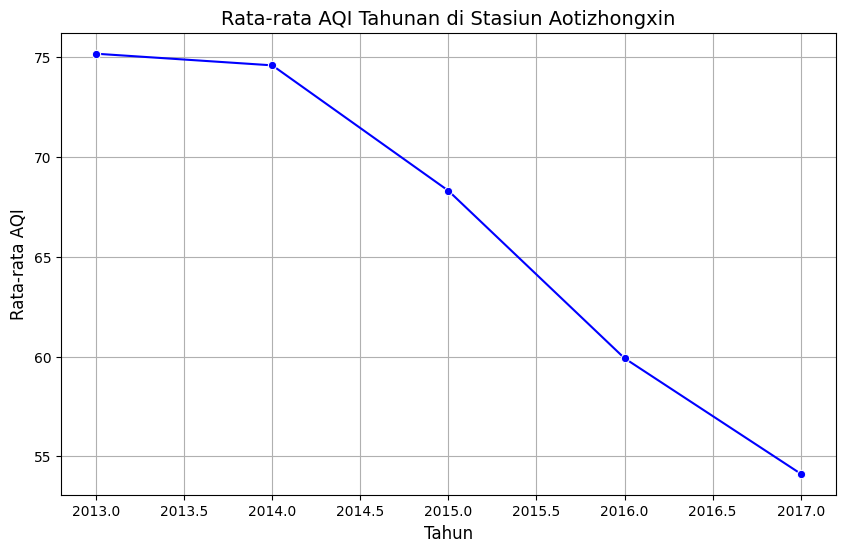

In [214]:
# memastikan 'date' dalam format datetime
aotizhongxin_df['date'] = pd.to_datetime(aotizhongxin_df['date'])

# Tambahkan kolom tahun
aotizhongxin_df['year'] = aotizhongxin_df['date'].dt.year

# Hitung rata-rata AQI per tahun
yearly_aqi = aotizhongxin_df.groupby('year')['AQI'].mean()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_aqi.index, y=yearly_aqi.values, marker='o', color='b', linestyle='-')

plt.title('Rata-rata AQI Tahunan di Stasiun Aotizhongxin', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata AQI', fontsize=12)
plt.grid(True)

plt.show()


**Insight:**
- AQI mengalami penurunan setiap tahun, yang berarti kualitas udara semakin membaik dari tahun ke tahun.
- Penurunan paling tajam terjadi setelah 2015

### Pertanyaan 3:
Adakah faktor cuaca yang mempengaruhi kualitas udara

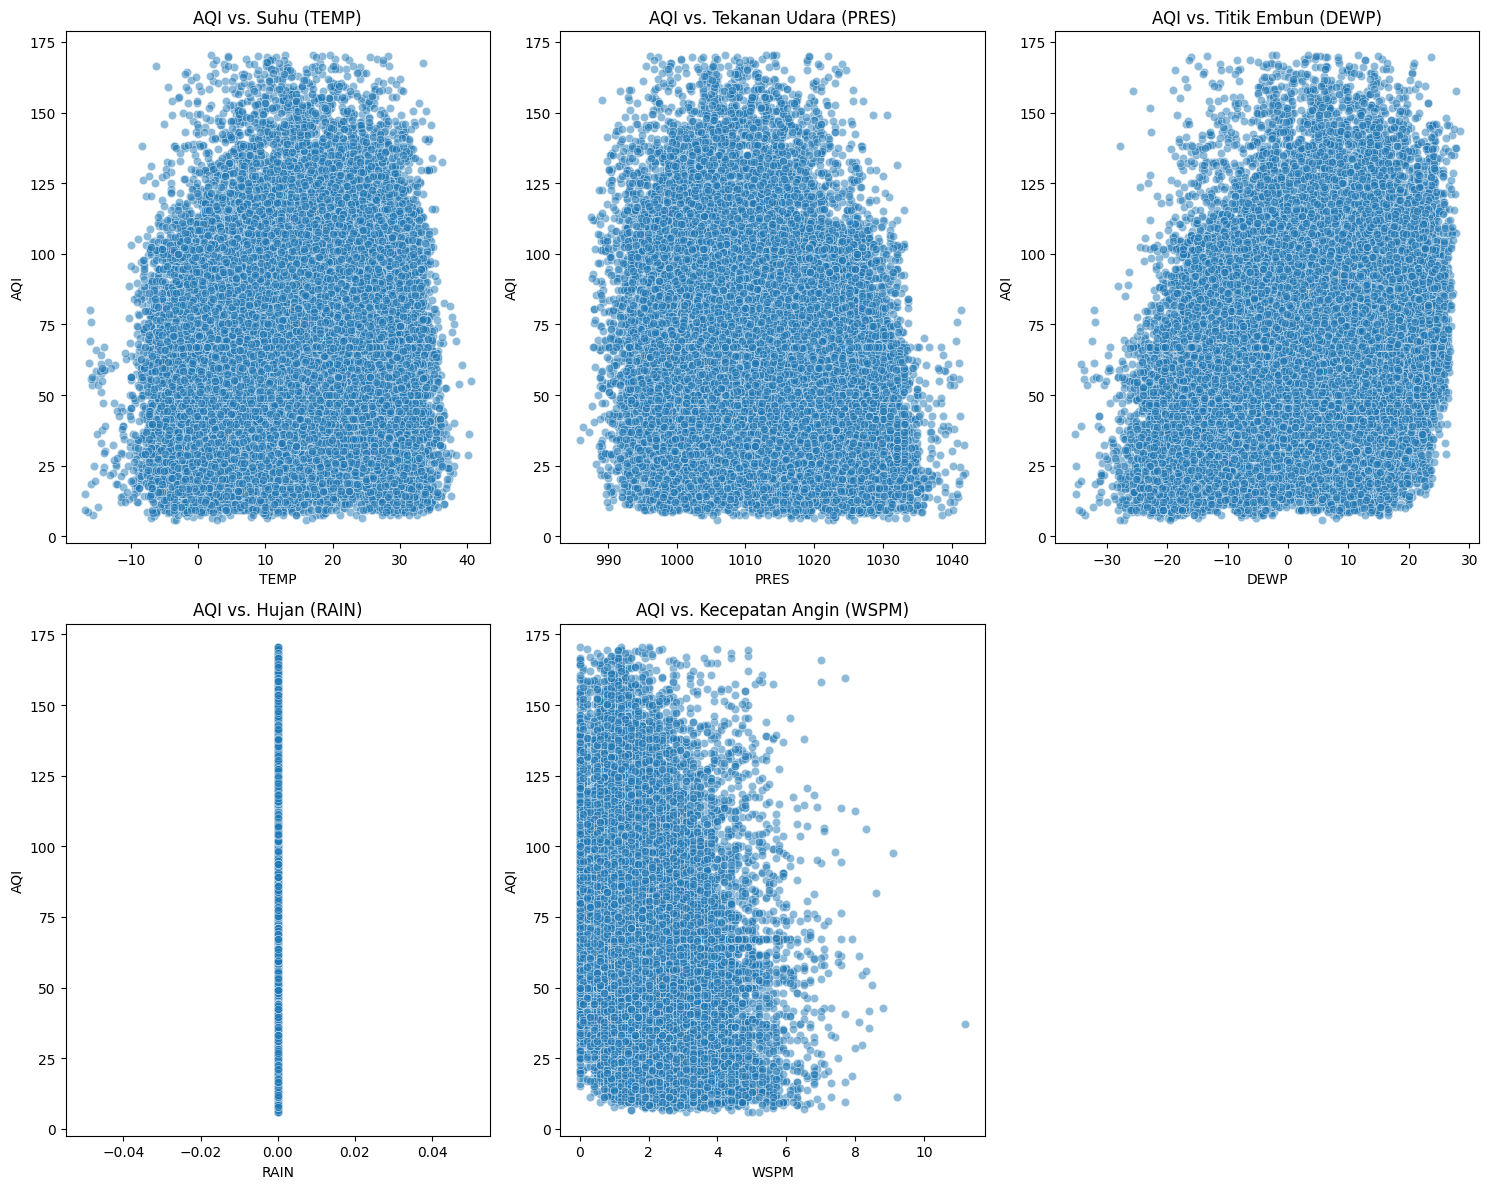

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar variabel cuaca yang akan dianalisis
weather_factors = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
titles = ['AQI vs. Suhu (TEMP)', 'AQI vs. Tekanan Udara (PRES)',
          'AQI vs. Titik Embun (DEWP)', 'AQI vs. Hujan (RAIN)',
          'AQI vs. Kecepatan Angin (WSPM)']

# Membuat scatter plot untuk masing-masing faktor cuaca terhadap AQI
plt.figure(figsize=(15, 12))

for i, factor in enumerate(weather_factors):
    plt.subplot(2, 3, i + 1)  # Menyusun dalam grid 2 baris, 3 kolom
    sns.scatterplot(x=aotizhongxin_df[factor], y=aotizhongxin_df['AQI'], alpha=0.5)
    plt.title(titles[i], fontsize=12)
    plt.xlabel(factor, fontsize=10)
    plt.ylabel('AQI', fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**
- Temp dengan AQI : Tidak ada pola yang jelas, menunjukkan korelasi lemah. Bisa dilihat dari titik data yang tersebar tanpa pola tertentu.
- Tekanan Udara (PRES) dengan AQI : Tidak menunjukkan hubungan signifikan. Bisa dilihat dari distribusi titik data yang acak.
- Titik Embun (DEWP) dengan AQI : Ada indikasi hubungan lemah, AQI cenderung lebih tinggi saat DEWP naik. Bisa dilihat dari kepadatan titik di DEWP tinggi.
- Hujan (RAIN) dengan AQI : Tidak ada variasi data hujan. Bisa dilihat dari titik yang hanya terkumpul di satu garis vertikal.
- Kecepatan Angin (WSPM) dengan AQI : AQI cenderung lebih rendah saat angin meningkat. Bisa dilihat dari titik data yang lebih banyak di AQI rendah saat WSPM naik.

## Conclusion

- Menurut data kualitas udara di Stasiun Aotizhongxin dari tahun 2013 hingga 2017, terjadi penurunan yang signifikan pada AQI setiap tahunnya, menunjukkan perbaikan kualitas udara secara keseluruhan.
- Polutan utama seperti PM10, PM2.5, NO2, dan CO juga mengalami tren penurunan, sedangkan O3 menunjukkan sedikit peningkatan dalam beberapa tahun terakhir. SO2 sempat menurun, tetapi kembali meningkat pada tahun 2017.
- Faktor cuaca menunjukkan pengaruh yang bervariasi terhadap AQI. Suhu dan tekanan udara tidak menunjukkan korelasi yang kuat dengan AQI, ditunjukkan oleh persebaran data yang tidak membentuk pola tertentu. Titik embun memiliki sedikit hubungan, di mana AQI cenderung lebih tinggi pada titik embun yang lebih tinggi. Kecepatan angin tampaknya berperan dalam menurunkan AQI, terlihat dari kecenderungan AQI yang lebih rendah pada kecepatan angin yang lebih tinggi. Sementara itu, data curah hujan tidak menunjukkan variasi yang berarti, sehingga sulit untuk menyimpulkan pengaruhnya terhadap kualitas udara.
- Secara keseluruhan, kualitas udara di Aotizhongxin mengalami perbaikan dalam lima tahun terakhir, dengan beberapa polutan utama menurun. Meskipun faktor cuaca memiliki pengaruh tertentu terhadap AQI, tidak semua variabel cuaca menunjukkan hubungan yang signifikan terhadap kualitas udara.

In [216]:
aotizhongxin_df.to_csv("data/aotizhongxin_data.csv", index=False)